In [1]:
import re

def parse_markdown_tables(md_text):
    sections = re.split(r'##\s+', md_text)
    tables = {}
    
    for section in sections[1:]:  # Skip the first split part before first '##'
        lines = section.split("\n")
        title = lines[0].strip()
        table_lines = [line for line in lines[1:] if '|' in line]
        
        if table_lines:
            headers = [h.strip() for h in table_lines[0].split('|')[1:-1]]  # Remove empty first/last from split
            data = [[cell.strip() for cell in row.split('|')[1:-1]] for row in table_lines[2:]]  # Skip headers and separators
            
            tables[title] = {"headers": headers, "rows": data}
    
    return tables

In [2]:
recall_3 = []
no_rank_3 = []
recall_4 = []
no_rank_4 = []
recall_5 = []
no_rank_5 = []
depths = []

In [5]:
for i in range(3, 21):
    with open(f"/home/jinho/beir/aizip/results/tesla_manual_eval_results_{i}.md", "r", encoding="utf-8") as file:
        md_text = file.read()

        tables = parse_markdown_tables(md_text)

        rows = tables['recall_at_3']['rows']

        for r in rows:
            if 'bge-reranker-large' in r:
                recall_3.append(float(r[3].replace("*", "")))
            else:
                no_rank_3.append(float(r[3].replace("*", "")))

        rows = tables['recall_at_4']['rows']

        for r in rows:
            if 'bge-reranker-large' in r:
                recall_4.append(float(r[3].replace("*", "")))
            else:
                no_rank_4.append(float(r[3].replace("*", "")))

        rows = tables['recall_at_5']['rows']

        for r in rows:
            if 'bge-reranker-large' in r:
                recall_5.append(float(r[3].replace("*", "")))
            else:
                no_rank_5.append(float(r[3].replace("*", "")))

        depths.append(i)

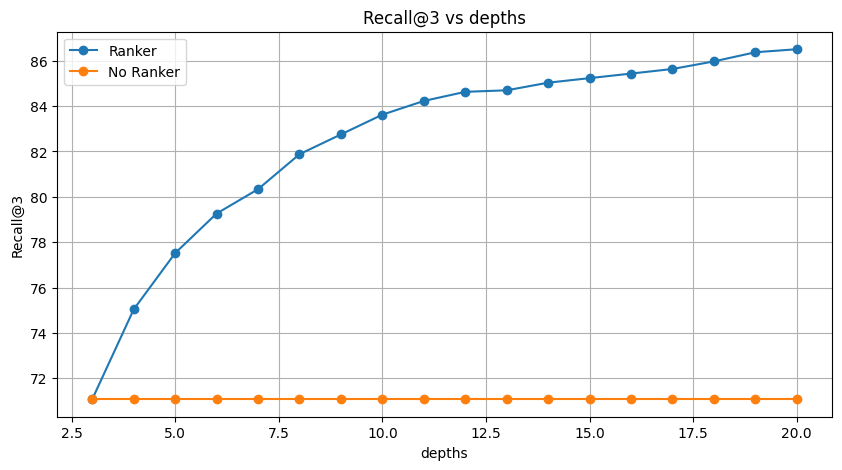

In [6]:
import matplotlib.pyplot as plt
# Plot the results
plt.figure(figsize=(10, 5))
# plt.plot(depths, recall_10, marker='o', linestyle='-', label='Recall@10')
plt.plot(depths, recall_3, marker='o', linestyle='-', label='Ranker')
plt.plot(depths, no_rank_3, marker='o', linestyle='-', label='No Ranker')
plt.xlabel('depths')
plt.ylabel('Recall@3')
plt.title('Recall@3 vs depths')
plt.legend()
plt.grid()
plt.show()

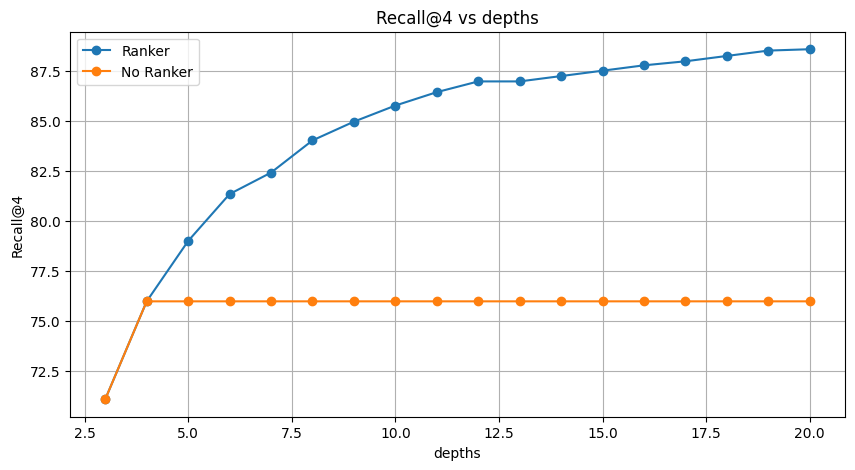

In [7]:
import matplotlib.pyplot as plt
# Plot the results
plt.figure(figsize=(10, 5))
# plt.plot(depths, recall_10, marker='o', linestyle='-', label='Recall@10')
plt.plot(depths, recall_4, marker='o', linestyle='-', label='Ranker')
plt.plot(depths, no_rank_4, marker='o', linestyle='-', label='No Ranker')
plt.xlabel('depths')
plt.ylabel('Recall@4')
plt.title('Recall@4 vs depths')
plt.legend()
plt.grid()
plt.show()

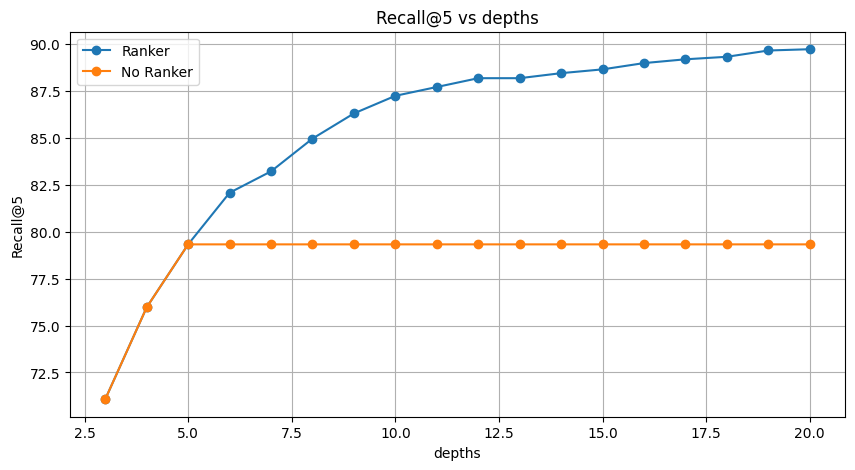

In [8]:
import matplotlib.pyplot as plt
# Plot the results
plt.figure(figsize=(10, 5))
# plt.plot(depths, recall_10, marker='o', linestyle='-', label='Recall@10')
plt.plot(depths, recall_5, marker='o', linestyle='-', label='Ranker')
plt.plot(depths, no_rank_5, marker='o', linestyle='-', label='No Ranker')
plt.xlabel('depths')
plt.ylabel('Recall@5')
plt.title('Recall@5 vs depths')
plt.legend()
plt.grid()
plt.show()